##### <font color="C13F38"><strong>This homework is due at midnight on April 4, 2023. </strong></font>

Run the cell below to get started.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Lab 3.1 – Connectionist modeling

In this lab, you will continue the work we did in the practice lab. You will expand the perceptron to include a hidden layer, so that the model can learn the XOR logical operator. You can earn 15 points with this lab

_Credits_

I am indebted to Todd Gureckis and Brenden Lake for making their course materials available online.

# 1. A network with a hidden layer and backpropagation
As we discussed in class and as we saw in the practice lab, perceptrons are perfectly fine for the OR and AND operations, but they are very limited. We saw this ourselves, because our perceptron failed to learn XOR.

Here, we will fix this, by including a new middle, or hidden, layer to the model. This layer will relinquish the model from just doing linear classification and allow it to learn XOR.

For the exercises in this section, we will need a model with an input layer with two neurons, a hidden layer with two neurons, and an output layer with two neurons. A diagram is given below:

![neuron_hidden](neurons_hidden_3-1-1.png)


Note that each hidden neuron and the output neuron are getting some bias input, and that between each consecutive set of layers all neurons are connected. So, each input neuron is connected to each hidden neuron, and each hidden neuron is connected to each output neuron (of course, here there is only one of those). All weights are indexed by, in order, the projecting layer (1: input to hidden, 2: hidden to output), the projecting neuron, and the receiving neuron. The latter index is omitted in the connection from the hidden layer, because there is only one receiving one. All biases are indexed in the same way.


Propagation of activity works virtually identical as for the perceptron case, but you will need to complete another step. First, the input neurons activate the hidden neurons. Second, the hidden neurons activate the output neuron. (In the model above, the connections between the input and hidden layers takes form of a matrix (with one row for each input neuron, and column for each output neuron). This means we perform matrix multiplication with the vector of inputs to compute the net activity of all hidden neurons in one fell swoop.

After activation is propagated through the model, we are going to again to change the connection strengths in all layers to make it perform better on the next epoch. To do so, we are going to compute the slope of the error function with respect to each of the weights. For the connections between the hidden and output layer, this will be identical to the update for the perceptron (but using the activations of the hidden weights instead of the input activations), but for the weights of the connections between the input and hidden layer things become a bit more elaborate.

In order to update each weight using gradient descent, we need to figure out how the slope of the error changes as a function of each respective weight. For the weights coming from the input to the hidden layer, this means we need to apply the chain rule a few more times. To see this, let’s first break up the derivative into two manageable bits (using the chain rule).

$\frac{\partial E}{\partial w_{1,i,j}} = \frac{\partial E}{\partial g(\textbf{net}_h)} \frac{\partial g(\textbf{net}_h)}{\partial w_{1,i,j}} $

We’ll tackle those two elements on the right in turn. For the first part (the derivative of the error with respect to the activation of the hidden neurons), we can again use the fact that $E$ is a quadratic function of $g(\textbf{net}_y)$ (the activity of the output neurons), specifically $(g(\textbf{net}_y)-y)^2$, so:

$\frac{\partial E}{\partial g(\textbf{net}_h)} = \frac{\partial E}{\partial g(\textbf{net}_y)} \frac{\partial g(\textbf{net}_y)}{\partial  g(\textbf{net}_h)}$ 

$=2(\hat{y}-y)  \frac{\partial g(\textbf{net}_y)}{\partial g(\textbf{net}_h)}$

Luckily, $g(\textbf{net}_h)$ is simply the activation of the hidden input connected to $w_{1,i,j}$ so it is $h_j$, and $\textbf{net}_y$ is the dot product of hidden activations and connections from the hidden layer to the output layer. So, this last derivative reduces to $w_{2,j}$ (write out $\textbf{net}_y$ to see why!):

$\frac{\partial E}{\partial g(\textbf{net}_h)} = 2(\hat{y}-y) g(\textbf{net}_y)(1-g(\textbf{net}_y))w_{2,j}$

Are you still with me? So far we have this:

$\frac{\partial E}{\partial w_{1,i,j}} = \frac{\partial E}{\partial g(\textbf{net}_h)} \frac{\partial g(\textbf{net}_h)}{\partial w_{1,i,j}} = \frac{\partial E}{\partial g(\textbf{net}_h)} = 2(\hat{y}-y) g(\textbf{net}_y)(1-g(\textbf{net}_y))w_{2,j} \frac{\partial g(\textbf{net}_h)}{\partial w_{1,i,j}}$

Let's fully write out that last part. This will be easy, and follows the logic from the perceptron gradient calculation.

$\frac{\partial g(\textbf{net}_h)}{\partial w_{1,i,j}} = \frac{\partial g(\textbf{net}_h)}{\partial \textbf{net}_h} \frac{\partial \textbf{net}_h}{\partial w_{1,i,j}} = g(\textbf{net}_h)(1-g(\textbf{net}_h))x_i$

So, the full update becomes a bit of a mess

$\frac{\partial E}{\partial w_{1,i,j}} = 2(\hat{y}-y) g(\textbf{net}_y)(1-g(\textbf{net}_y))w_{2,j}g(\textbf{net}_h)(1-g(\textbf{net}_h))x_i$

Essentially, we are taking twice the error $2(\hat{y} - y)$, and pushing it through the connection $w_{2,j}$, and we 'normalize' it by activation of the corresponding output and hidden neurons. Finally, we make the update dependent on how activated the input was. If input neuron $x_i$ was not activated, there will be no change, and if it was there will be a change. It is important to note that the first bunch of terms are the same as in the update rule for the output weights:

$2(\hat{y}-y)g(\textbf{net}_y)(1-g(\textbf{net}_y))...$

So each set of connection weights gets updated by the error produced in the output layer, and this error then gets sent back to earlier layers to update the weights. This idea, of propagating the error at the output backwards through the model is known as _backpropagation_. Even though this rule is derived mathematically, it makes intuitive sense. In fact, the rule reminds me a bit of action value updating in reinforcement learning.

You now have everything you need to code up the model with the hidden layer and teach your model XOR. As always, you are going to finish some code we give you to do this. You will need to copy the `or_pattern`, `and_pattern` and `xor_pattern` functions from the practice lab. You should also copy `logistic` from the practice lab as well, or you can just rewrite it.

<font color="508C46"><strong>Question 1 (11 points total)</strong><br>
Finish the code for the model with a hidden layer
<font>

<font color="508C46"><strong>Question 1.1 (1 point)</strong><br>
You will need to finish `initModel` (refer to the diagram above for the number of neurons in each layer).
<font>

In [3]:
# finish the following code:
def initModel():
    model = {}
    model['nrInputs'] = 2 # replace this with the number of inputs
    model['nrHiddens'] =2 # replace this with the number of hidden neurons
    model['nrOutputs'] = 1 # replace this with the number of output neurons
    
    model['outputWeights'] = np.random.rand(model['nrOutputs'],model['nrInputs']) # complete this line, there should be nrOutputs X nrInputs connections
    model['hiddenWeights'] = np.random.rand(model['nrHiddens'],model['nrInputs']) # complete this line, there should be nrHiddens X nrInputs connections
    
    # finish this line of code, but make sure to not remove any code
    model['biasOutput'] = np.random.rand(1,1) # think about how many output bias weights we need
    model['biasHidden'] = np.random.rand(2,1) # think about how many hidden bias weights we need

    model['learningRate'] = 0.1
    return model

In [4]:
# copy the logistic and patterns here
def or_pattern():
    pattern = {}
    pattern['inputs'] = np.array([[0,0],[0,1],[1,0],[1,1]]).T
    pattern['outputs'] = np.array([[0],[1],[1],[1]])
    return pattern

def logistic(x):
    y = 1/(1+np.exp(-x))
    return y

def and_pattern():
    pattern = {}
    pattern['inputs'] = np.array([[0,0],[0,1],[1,0],[1,1]]).T
    pattern['outputs'] = np.array([[0],[0],[0],[1]])
    return pattern

def xor_pattern():
    pattern = {}
    pattern['inputs'] = np.array([[0,0],[0,1],[1,0],[1,1]]).T
    pattern['outputs'] = np.array([[0],[1],[1],[0]])
    return pattern

<font color="508C46"><strong>Question 1.2 (1 points)</strong><br>
For `activate`, note that we are now returning two sets of activations one for the output layer, and one for the hidden layer. You should test `activate`, and make sure that it (a) returns the right number of activations, and (b) that it is able to handle both an individual pattern, and the whole set of input patterns. (also make sure you have defined logistic by either copying it over before this point or rewriting it!)
<font> 

In [5]:
# finish the following code:
def activate(model, inputActs):
    hiddenActs = logistic(model['hiddenWeights']@inputActs+ model['biasHidden']) # you need to complete this line
    outputActs = logistic(model['outputWeights']@inputActs+ model['biasOutput']) # you need to complete this line
    return outputActs, hiddenActs

In [6]:
model = initModel()
pattern = and_pattern()
model['outputWeights'][0][0] = 5.37
model['outputWeights'][0][1] = 5.37
model['biasOutput'] = -2.43

activate(model,pattern['inputs'][:,3])

(array([0.99975402]),
 array([[0.91334612, 0.76315402],
        [0.94052404, 0.82859775]]))

In [8]:
# # test your code here
# model=initModel()
# inputActs=or_pattern()

# activate(model,inputActs['inputs'][:,3]) #confirmed (a) and (b)

<font color="508C46"><strong>Question 1.3 (8 points)</strong><br>
Again, the hardest function to complete will be `trainModel`, where the real stuff happens. Some of the lines of code can be copied straight from the perceptron exercise in the practice lab (this will be indicated in the comments), but others will have to be written by you. The `partialHiddens` variable will store the slopes $\frac{\partial E}{\partial w_{1,i,j}}$ (except for the input activations) so you can use the formula above to finish. The `partialOutputs` variable will store the slopes $\frac{\partial E}{\partial w_{2,j}}$ (except for the hidden activations).

<font color="508C46">Do not compute `partialOutputs` and `partialHidden` by multiplying them by the activations of the hidden and input neurons! This lets you reuse `partialOutputs` to compute `partialHiddens` (note that it is in there!), and to reuse them to update the biases and the weights.
    
<font color="508C46">When you are doing backpropagation, we push the slopes at the output layer through the weights back to the input layer. To do this, we will once again matrix multiply the output weights with some activations, but now we are going to transpose the matrix of output weights (we've provided this code for you already). Think about this as follows, when propagating the input activations to the output unit, the model goes from 2 to 1 number. Here, however, we go to the opposite way, from 1 to 2 numbers. Therefore, we need to flip the matrix around.
    
<font color="508C46">For a similar reason, you will need to transpose (`.T`) the activations of the output and hidden neurons when performing the actual updates. We've provided a hint in the comments as well, so please make sure you do this. If you don't quite understand what this means: try it out in a code cell.
    
<font color="508C46"><strong>IMPORTANT:</strong><br>For some reason, Numpy forgets about the dimensionality of a column from a matrix, when you extract it using indexing. To see this, follow the following code in a cell somwhere. First, we define a $2\times 2$ matrix `a`:
    
    a = np.array([[2,3],[4,5])

<font color="508C46">Next, let's try to extract the first column:
    
    a[:,0]
    
<font color="508C46">The output will look like this:
    
    array([2, 3])

<font color="508C46">That doesn't look quite like a column right? Indeed, now Python does not know about the shape of this variable anymore. However, because we are going to use matrix multiplication, the shape of each variable is important. Therefore, we'll need to use "slicing" instead of indexing, but in a kinda silly way. Let's first show you. If you type this:
    
    a[:,0:1]
    
<font color="508C46">the output will look like this:
    
    array([[2],
       [3]])

<font color="508C46">Numpy likes slicing a lot better. (Think about why we don't see two columns here, even though we ask for `0:1`!) Therefore, whenever we start an epoch of training, we will extract the correct input column (and output) column using slicing. We implemented this for you already (e.g., `inputActs = pattern['inputs'][:,p:(p+1)]`), so you don't have to worry about it, but we wanted to let you know, because it looks a bit weird.
    
<font> 

In [9]:
# you can try the slicing example here if you'd like

In [7]:
# finish the code below
def trainModel(model, pattern, nrEpochs):
    results = {}
    results['SSE'] = np.zeros(nrEpochs)

    nrPatterns = len(pattern['outputs'])

    for epoch in range(nrEpochs):
        for p in range(nrPatterns):
            
            inputActs = pattern['inputs'][:,p:(p+1)] # don't touch. this is where we do the weird slicing stuff
            desiredOutput = pattern['outputs'][p:(p+1)] # don't touch. this is where we do the weird slicing stuff
            
            outputActs, hiddenActs =  activate(model,inputActs) # complete this line
            outputError = outputActs - desiredOutput # copy from perceptron practice lab
            
            partialOutputSlopes = 2*outputError * outputActs * (1-outputActs)# copy from perceptron lab don't multiply by the activation
            #partialHiddens = (model['outputWeights'].T@partialOutputSlopes)*(1-model['outputWeights'].T@partialOutputSlopes) + model['biasHidden'] # you need to complete this line
            partialHiddens = (model['outputWeights'].T@partialOutputSlopes) * hiddenActs * (1-hiddenActs)
            # when updating the weights by the hidden activations don't forget to transpose (.T) them (the activations!)
            model['outputWeights'] = model['outputWeights'] - model['learningRate'] * partialOutputSlopes* hiddenActs.T # you need to complete this line
            #model['outputWeights'] = model['outputWeights'] - model['learningRate'] * partialHiddens*pattern['inputs'][:,p].T # you need to complete this line
            model['biasOutput'] = model['biasOutput'] - model['learningRate'] * partialOutputSlopes  # Note that the bias is simply a neuron with activity always 1
            
            # when updating the weights by the input activations don't forget to transpose (.T) them (the activations!)
            model['hiddenWeights'] = model['hiddenWeights'] - model['learningRate']* partialHiddens* inputActs.T# you need to complete this line, multiply by the input activations
            model['biasHidden'] = model['biasHidden'] - model['learningRate'] * partialHiddens # Note that the biases are simply neurons with activity always at 1
            
            results['SSE'][epoch] = results['SSE'][epoch] + np.sum(outputError**2) # sum of squared errors
            
    # save the activations for verification        
    finalOutputs,_ = activate(model,pattern['inputs']) # store the output activations for verification
    results['outputActs'] = finalOutputs
    
    return model, results

<font color="508C46"><strong>Question 2 (5 point)</strong><br>
Use `trainModel` to teach two separate models OR and AND over, say, 2500 epochs. **<u>Does it work? How do you know?</u>**
<font> 

In [8]:
# your code here
model=initModel()
input_or=or_pattern()
input_and=and_pattern()
model,results = trainModel(model, input_or, 2500)
model,results_and=trainModel(model, input_and, 2500)
print(results_and)
print(results)

{'SSE': array([1.86627356, 1.86288301, 1.85937412, ..., 0.01145622, 0.01145121,
       0.0114462 ]), 'outputActs': array([[5.37803638e-06, 8.79029904e-04, 8.94220077e-02, 9.41401295e-01]])}
{'SSE': array([0.59045825, 0.59022704, 0.59005254, ..., 0.01229409, 0.01228616,
       0.01227824]), 'outputActs': array([[0.08439366, 0.92835793, 0.99877266, 0.99999126]])}



.. double click this to type your response

Yes! For the AND models, the array of 0,0,0,1 reflects the desired output of the only instance where AND is true is when both inputs are 1. Similarly, for the OR model, the desired output of 0,1,1,1 is achieved

<font color="508C46"><strong>Question 3 (5 points)</strong><br>
Now, try to teach a new model XOR again over 2500 epochs. Do this a few times. **<u>How often does the model learn the right pattern?</u>** Now, change the number of epochs to 5000. Again, teach a new model the pattern a couple of times. **<u>Does it work? Does it always work? If not, what can you do to make it always work?</u>**
<font> 

In [15]:
# your code here
input_Xor=xor_pattern()
model = initModel()
model,results_xor=trainModel(model, input_Xor, 5000)
results_xor

{'SSE': array([1.20320678, 1.18798918, 1.17341601, ..., 1.04535459, 1.04534605,
        1.04533751]),
 'outputActs': array([[0.06860327, 0.00227095, 0.84753344, 0.14659592]])}


.. double click this to type your response

The model does not learn the pattern very well, it only works some of the time. Increasing the number of epochs will help it learn eventually

<font color="508C46"><strong>Question 4 (5 points)</strong><br>
Compare the evolution of the sum of squared errors over time for the three models. **<u>What do you notice? Explain.</u>**
<font> 

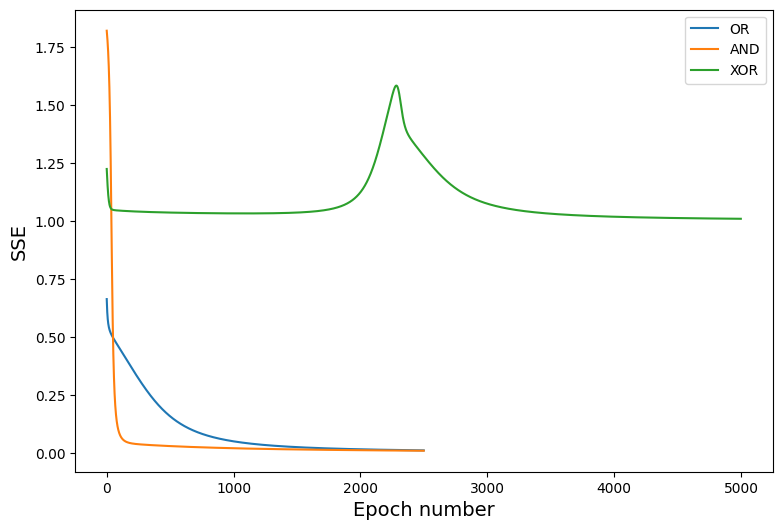

In [43]:
# your code here
plt.figure(figsize=(9,6))
plt.plot(results['SSE'], label='OR')
plt.plot(results_and['SSE'], label='AND')
plt.plot(results_xor['SSE'], label='XOR')
plt.xlabel('Epoch number', fontsize=14)
plt.ylabel('SSE', fontsize=14)
plt.legend()


.. double click this to type your response

The sum of square error stayed pretty much the same in the XOR condition over time while for both the AND and the or conditions it decreased to nearly zero. The AND condition started with a higher SSE and took longer to learn than OR did. 